In [1]:
from model import CRNN
from Dataset.CropDataset import CropDataset, GeneratedDataset, CommonDataset
from transforms import get_transforms
import torch
import string
import matplotlib.pyplot as plt
from predictor import Predictor
import numpy as np
import cv2

device=torch.device('cpu:0')

dataset = CommonDataset(transforms=None, cached=False)

pred = Predictor()

nb 4134
neg 750
gen 4994


In [2]:
len(dataset.Train)

6900

In [3]:
ds = dataset.Train[91]
ds1 = dataset.Train[831]
ds[0].shape

(48, 144, 3)

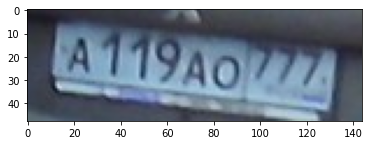

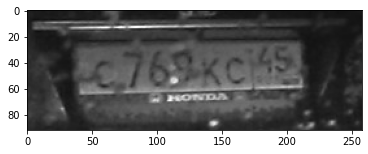

In [4]:
plt.imshow(ds[0], cmap='gray')
plt.show()
plt.clf()
plt.imshow(ds1[0], cmap='gray')

In [5]:
result = pred.predict([ds[0], ds1[0]])
print(result)

['A119AO', 'C769KC']


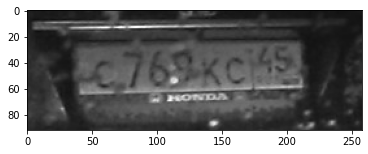

In [6]:
art = ds1[0]
plt.imshow(art)

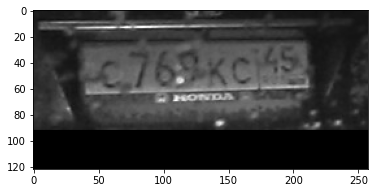

In [7]:
art = np.resize(art, (art.shape[0] + 30, art.shape[1], art.shape[2]))
art[-30:] = 0
plt.imshow(art)

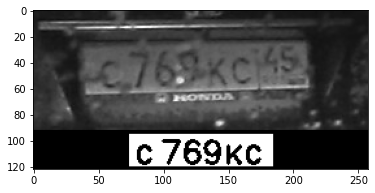

In [8]:
mid = (art.shape[1] // 2, art.shape[0] - 15)
font = cv2.FONT_HERSHEY_SIMPLEX

deltas = [-55, -36, -20, -4, 14, 29]

def draw_char(img, ch, num):
    if ch.isdigit():
        size = 0.8
    else:
        size = 0.6
    std = (mid[0] + deltas[num] + 5, mid[1] + 10)
    cv2.putText(art, ch, std, font, size, (0, 0, 0), thickness = 2)
     
art = cv2.rectangle(art, (mid[0] - 55, mid[1] - 12), (mid[0] + 55, mid[1] + 12), (255, 255, 255), thickness=-1)

for i in range(len(result[1])):
    draw_char(art, result[1][i], i)

plt.imshow(art)